In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

| Feature                | Description                                                                                                   | Values/Units                                               |
|------------------------|---------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------|
| age                    | Age of the patient                                                                                           | Years                                                       |
| sex                    | Sex of the patient                                                                                           | 1 = Male, 0 = Female                                        |
| chest pain type        | Type of chest pain experienced by the patient                                                                | 0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic |
| trestbps               | Resting blood pressure                                                                                       | mm Hg                                                       |
| chol                   | Serum cholesterol                                                                                            | mg/dl                                                       |
| fbs                    | Fasting blood sugar > 120 mg/dl                                                                              | 1 = True, 0 = False                                         |
| restecg                | Resting electrocardiographic results                                                                         | 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy |
| thalach                | Maximum heart rate achieved                                                                                  | Beats per minute                                            |
| exang                  | Exercise induced angina                                                                                      | 1 = Yes, 0 = No                                             |
| oldpeak                | ST depression induced by exercise relative to rest                                                           | Numeric value                                               |
| slope                  | Slope of the peak exercise ST segment                                                                        | 1 = Upsloping, 2 = Flat, 3 = Downsloping                    |
| ca                     | Number of major vessels colored by fluoroscopy                                                               | 0-3                                                         |
| thal                   | Thalassemia status                                                                                           | 3 = Normal, 6 = Fixed defect, 7 = Reversible defect         |
| target                 | Diagnosis of heart disease                                                                                   | 0 = Less chance of heart attack, 1 = More chance of heart attack |


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/My Drive/heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.shape

(1025, 14)

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [ ]:
data1=data.copy()

In [ ]:
duplicate_count = data1.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 723


In [ ]:
data1 = data1.drop_duplicates()

In [ ]:
data1.shape

(302, 14)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              302 non-null    int64   
 1   sex              302 non-null    object  
 2   cp               302 non-null    int64   
 3   trestbps         302 non-null    int64   
 4   chol             302 non-null    int64   
 5   fbs              302 non-null    object  
 6   restecg          302 non-null    int64   
 7   thalach          302 non-null    int64   
 8   exang            302 non-null    int64   
 9   oldpeak          302 non-null    float64 
 10  slope            302 non-null    int64   
 11  ca               302 non-null    int64   
 12  thal             302 non-null    int64   
 13  target           302 non-null    int64   
 14  trestbps_binned  300 non-null    category
dtypes: category(1), float64(1), int64(11), object(2)
memory usage: 35.9+ KB


In [ ]:
# Calculate the correlation matrix
correlation_matrix = data1.corr()

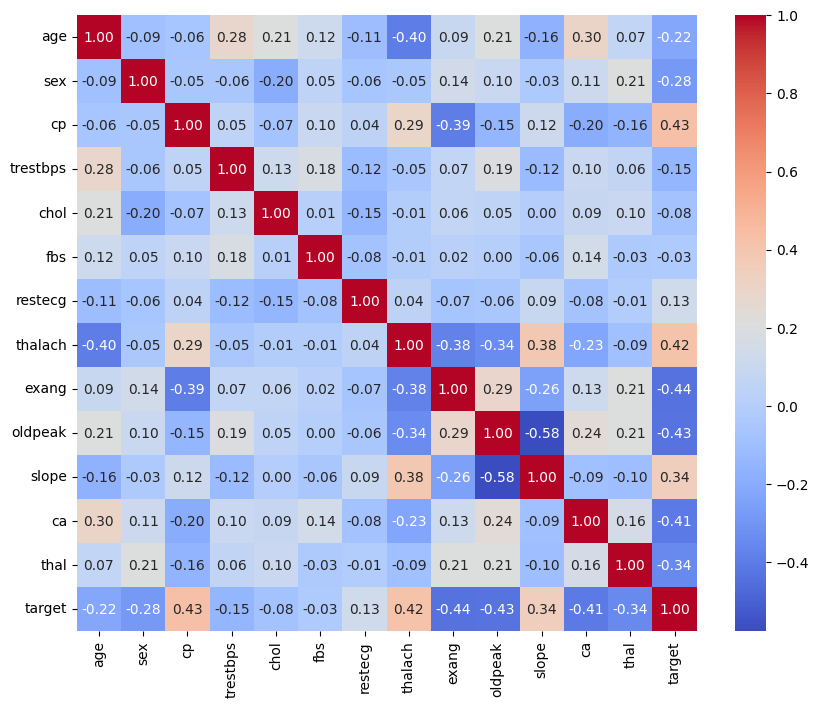

In [ ]:
# Set up the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

In [ ]:
data1 = pd.DataFrame(data1)

# Convert 0 to 'Female' and 1 to 'Male'
data1['sex'] = data1['sex'].map({0: 'Female', 1: 'Male'})

# Display the DataFrame
print(data1)

     age     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    Male   0       125   212    0        1      168      0      1.0   
1     53    Male   0       140   203    1        0      155      1      3.1   
2     70    Male   0       145   174    0        1      125      1      2.6   
3     61    Male   0       148   203    0        1      161      0      0.0   
4     62  Female   0       138   294    1        1      106      0      1.9   
..   ...     ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68  Female   2       120   211    0        0      115      0      1.5   
733   44  Female   2       108   141    0        1      175      0      0.6   
739   52    Male   0       128   255    0        1      161      1      0.0   
843   59    Male   3       160   273    0        0      125      0      0.0   
878   54    Male   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3

## **Gender Distribution**

<ipython-input-30-9c3dfc2cef83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='sex', data=data1, palette="viridis")


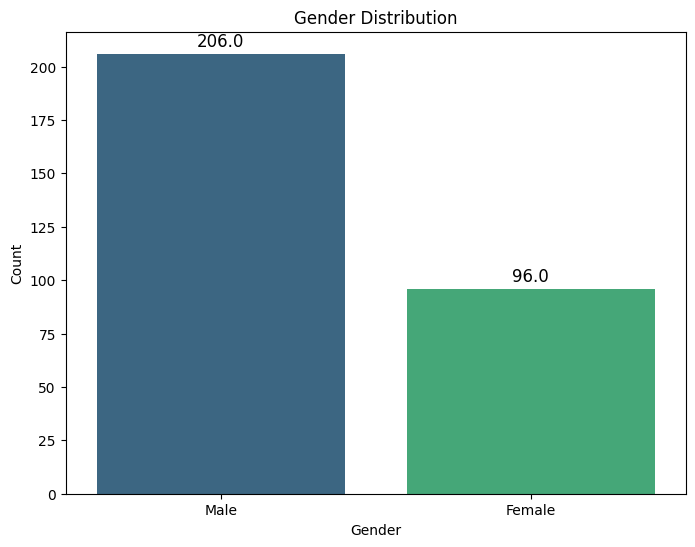

In [ ]:
# Create count plot with differentiated colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', data=data1, palette="viridis")

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    ax.set_title('Gender Distribution')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')

plt.show()

## **Heart Disease Incidence**

<ipython-input-32-582d624b4dda>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=data1, palette="viridis")


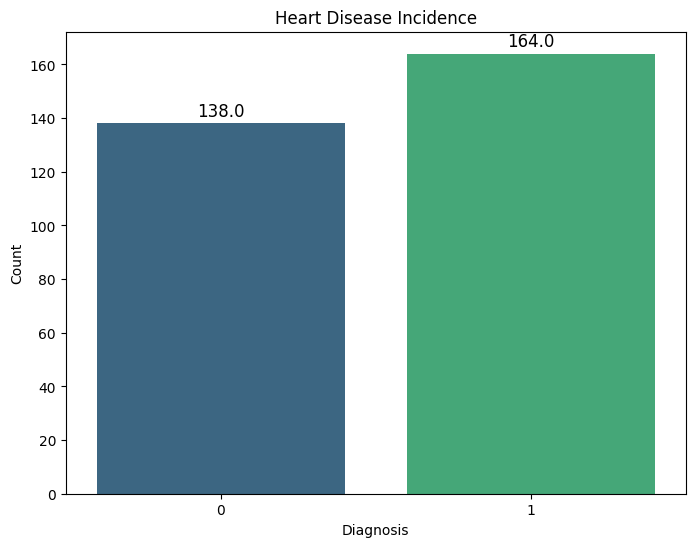

In [ ]:
# Create count plot with differentiated colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=data1, palette="viridis")

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    ax.set_title('Heart Disease Incidence')
    ax.set_xlabel('Diagnosis')
    ax.set_ylabel('Count')

plt.show()

## **Gender Vs Diagnosis**

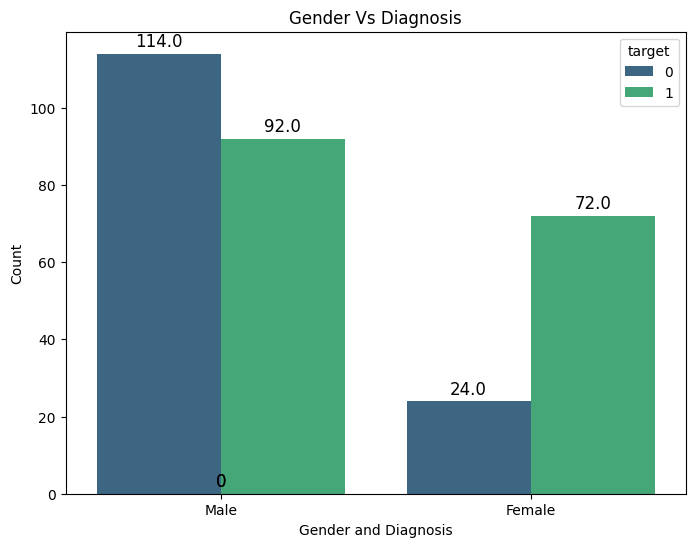

In [ ]:
# Create count plot with differentiated colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sex', hue='target',data=data1, palette="viridis")

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    ax.set_title('Gender Vs Diagnosis')
    ax.set_xlabel('Gender and Diagnosis')
    ax.set_ylabel('Count')

plt.show()

## **Age Distribution**

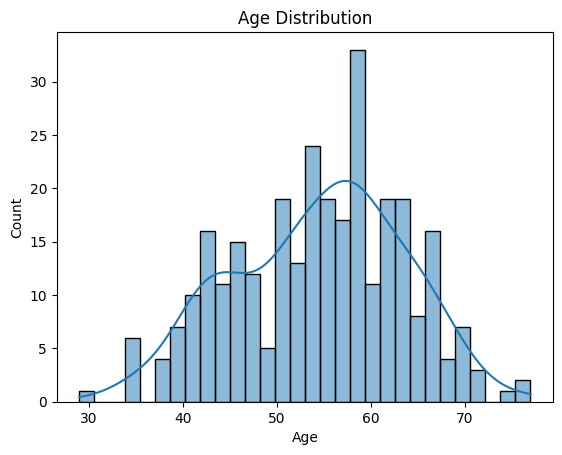

In [ ]:
ax = sns.histplot(data1['age'],bins=30,kde=True);
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.show()

## **Chest Pain Analysis**

<ipython-input-42-526caa6b5756>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cp',data=data1,palette="viridis")


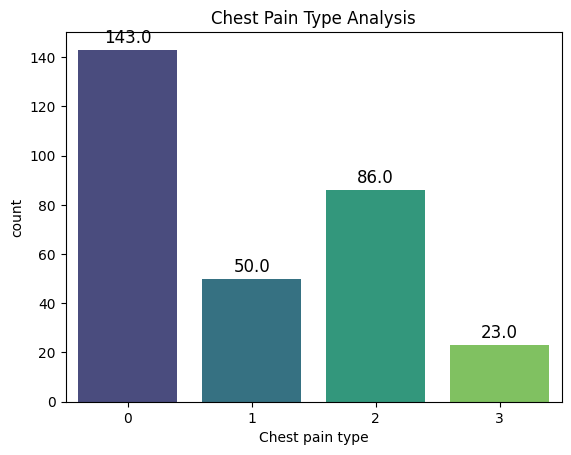

In [ ]:
ax = sns.countplot(x='cp',data=data1,palette="viridis")
# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
ax.set_title('Chest Pain Type Analysis')
ax.set_xlabel('Chest pain type')
ax.set_ylabel('count')
plt.show();

## **Chest Pain Distribution as Per Target Variable**

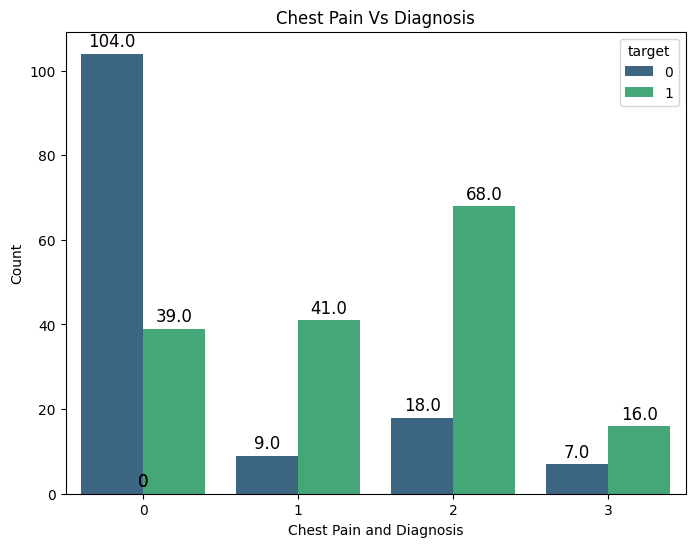

In [ ]:
# Create count plot with differentiated colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='cp', hue='target',data=data1, palette="viridis")

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    ax.set_title('Chest Pain Vs Diagnosis')
    ax.set_xlabel('Chest Pain and Diagnosis')
    ax.set_ylabel('Count')

plt.show()

In [ ]:
data1 = pd.DataFrame(data1)

# Convert 0 to 'Female' and 1 to 'Male'
data1['fbs'] = data1['fbs'].map({0: 'False', 1: 'True'})

# Display the DataFrame
print(data1)

     age     sex  cp  trestbps  chol    fbs  restecg  thalach  exang  oldpeak  \
0     52    Male   0       125   212  False        1      168      0      1.0   
1     53    Male   0       140   203   True        0      155      1      3.1   
2     70    Male   0       145   174  False        1      125      1      2.6   
3     61    Male   0       148   203  False        1      161      0      0.0   
4     62  Female   0       138   294   True        1      106      0      1.9   
..   ...     ...  ..       ...   ...    ...      ...      ...    ...      ...   
723   68  Female   2       120   211  False        0      115      0      1.5   
733   44  Female   2       108   141  False        1      175      0      0.6   
739   52    Male   0       128   255  False        1      161      1      0.0   
843   59    Male   3       160   273  False        0      125      0      0.0   
878   54    Male   0       120   188  False        1      113      0      1.4   

     slope  ca  thal  targe

## **Fasting Blood Sugar Distribution**

<ipython-input-47-c2244c0aec45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='fbs', data=data1, palette="viridis")


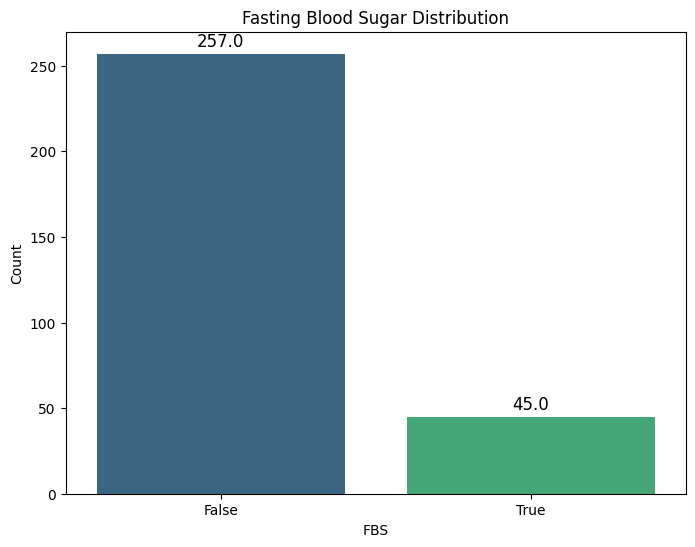

In [ ]:
# Create count plot with differentiated colors
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='fbs', data=data1, palette="viridis")

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    ax.set_title('Fasting Blood Sugar Distribution')
    ax.set_xlabel('FBS')
    ax.set_ylabel('Count')

plt.show()

## **Resting Blood Pressure Distribution**

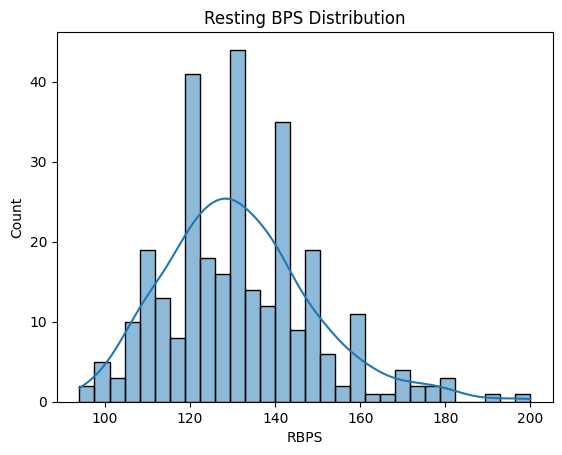

In [ ]:
ax = sns.histplot(data1['trestbps'],bins=30,kde=True);
ax.set_title('Resting BPS Distribution')
ax.set_xlabel('RBPS')
ax.set_ylabel('Count')
plt.show()

## **Resting Blood Pressure Comparison by Sex**

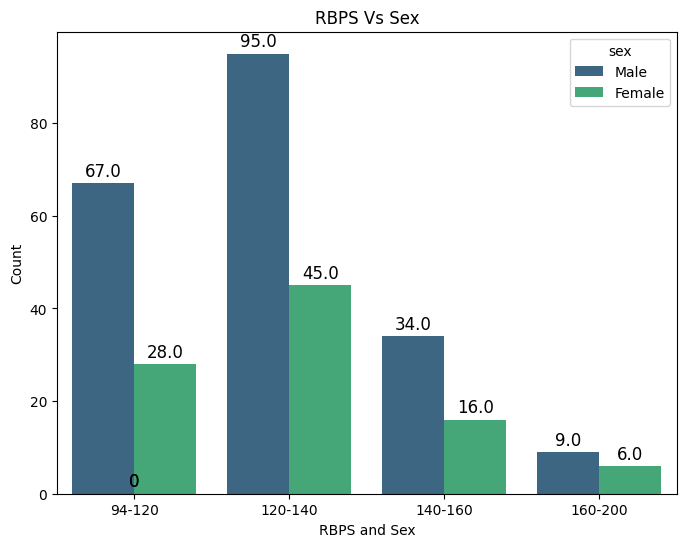

In [ ]:
# Create count plot with differentiated colors
plt.figure(figsize=(8, 6))
data1['trestbps_binned'] = pd.cut(data1['trestbps'], bins=[94, 120, 140, 160, 200],
                                  labels=['94-120', '120-140', '140-160', '160-200'])
ax = sns.countplot(x='trestbps_binned', hue='sex',data=data1, palette="viridis")

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline',
                fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    ax.set_title('RBPS Vs Sex')
    ax.set_xlabel('RBPS and Sex')
    ax.set_ylabel('Count')

plt.show()

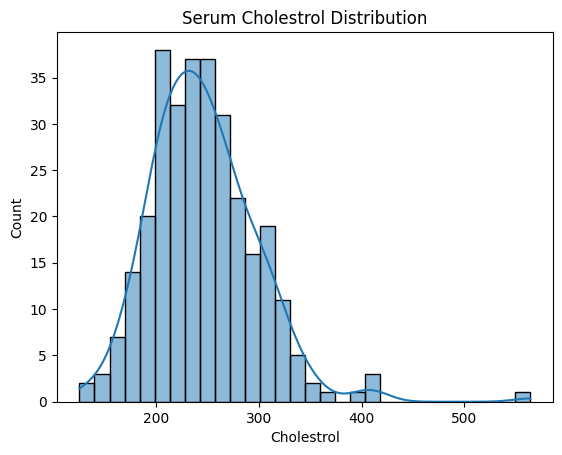

In [ ]:
ax = sns.histplot(data1['chol'],bins=30,kde=True);
ax.set_title('Serum Cholestrol Distribution')
ax.set_xlabel('Cholestrol')
ax.set_ylabel('Count')
plt.show()

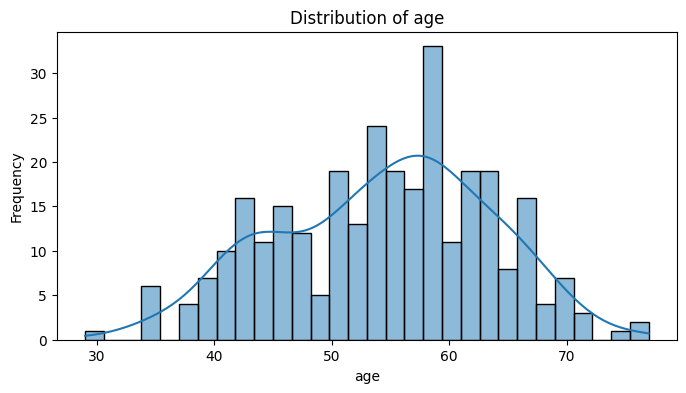

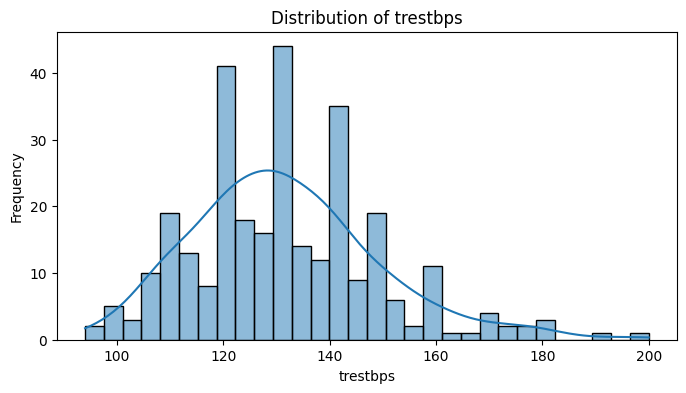

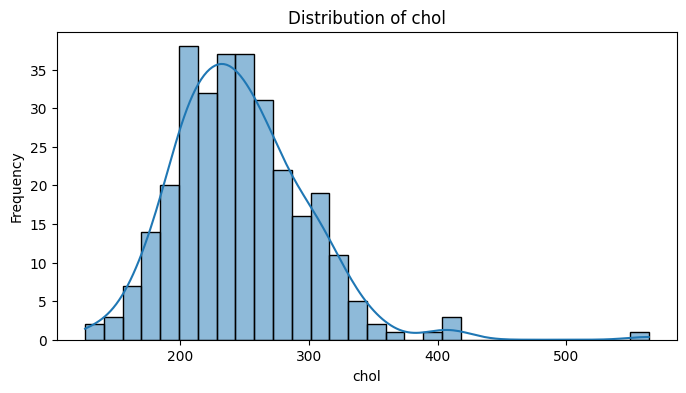

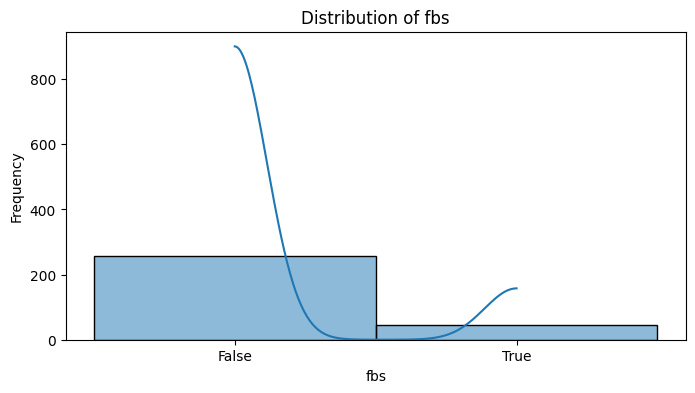

In [ ]:
# List of continuous variables
continuous_vars = ['age','trestbps', 'chol','fbs']

# Plot histograms
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(data1[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()